In [31]:
import numpy as np
import sympy
import pandas as pd
from IPython.display import display, Math


In [32]:
# Para o caso de carga 2
L_caso_2 = np.array([155.78,540.69,638.48,484.19,436.33,382.20,294.12,200.86,83.25])
L_caso_2 = L_caso_2/2 # N
S_half=929109 # mm^2
L_tot_caso_2 = 3215.33/3 # N
linear_part = np.linspace(525, 214, 7)
print(linear_part)
# 2. Definir a parte inicial
initial_part = np.array([525, 525])

# 3. Concatenar as partes para formar o array completo
#    O resultado será [525, 525, 525, 473.16..., ..., 214]
Cordas_Asa = np.concatenate((initial_part, linear_part))

display((r'Podemos aproximar que'),Math(r'$\frac{L/2}{S/2}=C_{li}q$'))
V=29.8 # m/s
rho = 1.225 # kg/m^3
#Cordas_Asa = np.array([525,525,525,469.54,414.5,359.4,304.29,259.28,214.28]) # mm
Dists_Nervuras = np.array([0,172,600,896,1190.5,1485,1779.5,2020,2260.5]) # mm

[525.         473.16666667 421.33333333 369.5        317.66666667
 265.83333333 214.        ]


'Podemos aproximar que'

<IPython.core.display.Math object>

In [33]:

V_i, V_im1 = sympy.symbols('V_i V_{i-1}')
q_sym, C_i_sym, C_ni_sym, C_im1_sym, C_nim1_sym, Y_i_sym, Y_im1_sym, C_n_i_m1_sym = sympy.symbols(
    'q C_i C_{ni} C_{i-1} C_{n,i-1} Y_i Y_{i-1}'
)
term_added_sym = (q_sym) * ((C_i_sym * C_ni_sym + C_im1_sym * C_nim1_sym) / 2) * (Y_im1_sym - Y_i_sym)
n_stations = len(Dists_Nervuras)
recursive_formula_sym = V_im1 + term_added_sym

display(f"V_i = {recursive_formula_sym}")

q_val = 0.5*V**2*rho/1000000 # kgmm/s^2
print(q_val)
cli_cte = (L_tot_caso_2/2)/(q_val*S_half/2)
display(cli_cte)
V0_val = 0
V_shear_force = np.zeros(n_stations)
results_list = []
results_list_tip_to_root = [None] * n_stations # Prealoca lista

# A força cortante na ponta exata (estação n-1) é zero.
# Armazena dados da estação da ponta (índice n_stations-1)
tip_index = n_stations - 1
results_list_tip_to_root[tip_index] = {
    'i': tip_index,
    'Y_i (mm)': Dists_Nervuras[tip_index],
    'C_i (mm)': Cordas_Asa[tip_index],
    'V_i (N)': V_shear_force[tip_index], # = 0.0
    'dL_inward (N)': 0.0 # Carga adicionada da seção mais externa
}



# Itera da penúltima estação (n-2) descendo até a raiz (0)
for j in range(n_stations - 2, -1, -1):
    # j: índice da estação atual (mais interna)
    # j+1: índice da estação mais externa (já calculada ou ponta)

    # Dados das estações j e j+1
    C_j = Cordas_Asa[j]
    Y_j = Dists_Nervuras[j]
    C_j_plus_1 = Cordas_Asa[j+1]
    Y_j_plus_1 = Dists_Nervuras[j+1]

    # Valor da cortante na estação externa V_{j+1}
    V_j_plus_1 = V_shear_force[j+1]

    # Calcula os termos da fórmula
    avg_chord = (C_j + C_j_plus_1) / 2.0 # Média das cordas [mm]
    delta_Y = Y_j_plus_1 - Y_j           # Distância entre estações [mm] (sempre > 0)

    # Sustentação (carga) adicionada na seção entre j e j+1
    # dL = q * CL * c_media * delta_y
    dL_section = q_val * cli_cte * avg_chord * delta_Y # [N]

    # Calcula V_j = V_{j+1} + dL_section
    V_shear_force[j] = V_j_plus_1 + dL_section

    # Armazena resultados para esta estação j
    results_list_tip_to_root[j] = {
        'i': j,
        'Y_i (mm)': Y_j,
        'C_i (mm)': C_j,
        'V_i (N)': V_shear_force[j],
        'dL_inward (N)': dL_section # Carga adicionada da seção j, j+1
    }


# --- Organização e Exibição dos Resultados ---
df_results_tip_to_root = pd.DataFrame(results_list_tip_to_root)
df_results_tip_to_root.set_index('i', inplace=True)

# Configurações do Pandas para melhor visualização
pd.set_option('display.float_format', '{:.4f}'.format)

print("\nTabela de Resultados Detalhados (Python - Ponta para Raiz):")
print(df_results_tip_to_root)

print("\nTabela Resumida (V_i - Python - Ponta para Raiz):")
print(df_results_tip_to_root[['V_i (N)']])


'V_i = V_{i-1} + q*(Y_i - i-1})*(C_i*C_{ni}/2 + C_{i-1}*C_{n/2)'

0.0005439245


2.120796557369625


Tabela de Resultados Detalhados (Python - Ponta para Raiz):
   Y_i (mm)  C_i (mm)   V_i (N)  dL_inward (N)
i                                             
0    0.0000  525.0000 1084.2767       104.1659
1  172.0000  525.0000  980.1109       259.2034
2  600.0000  525.0000  720.9075       170.4129
3  896.0000  473.1667  550.4946       151.9404
4 1190.5000  421.3333  398.5542       134.3315
5 1485.0000  369.5000  264.2227       116.7226
6 1779.5000  317.6667  147.5000        80.9401
7 2020.0000  265.8333   66.5600        66.5600
8 2260.5000  214.0000    0.0000         0.0000

Tabela Resumida (V_i - Python - Ponta para Raiz):
    V_i (N)
i          
0 1084.2767
1  980.1109
2  720.9075
3  550.4946
4  398.5542
5  264.2227
6  147.5000
7   66.5600
8    0.0000


261.6629772548866
[np.float64(524.1623089441198), np.float64(523.4019848871869), np.float64(514.6757915812842), np.float64(476.79949409115216), np.float64(432.9412585474951), np.float64(381.82468636045076), np.float64(320.18524513470794), np.float64(249.88546503302146), np.float64(0.0)]
[-1.38680552e-04  1.19977705e-01  5.06342477e+02]
[  86.    386.    748.   1043.25 1337.75 1632.25 1899.75 2140.25]
[   0.     86.    386.    748.   1043.25 1337.75 1632.25 1899.75 2140.25
 2260.5 ]
0.0011535532070689949
43959.727736466826
157767.94786318575
191234.14769266287
148082.13228761204
133002.98063721007
111228.30088231056
76206.82989483055
43808.728070326906
11872.113496440637
Coeficientes do ajuste polinomial: [-1.38680552e-04  1.19977705e-01  5.06342477e+02]
Áreas integradas sob a curva ajustada em cada intervalo: [50.70988491228115, 181.99372223027189, 220.59876437197704, 170.82061860999, 153.42601486378908, 128.30776319962445, 87.90863302574311, 50.535698763139095, 13.695114598506194]


C:\Users\Formiga\AppData\Local\Temp\ipykernel_10592\918908162.py:10: RuntimeWarning: invalid value encountered in sqrt
  return 2*((A**2*B**2-x**2*B**2)/(A**2))**(0.5)


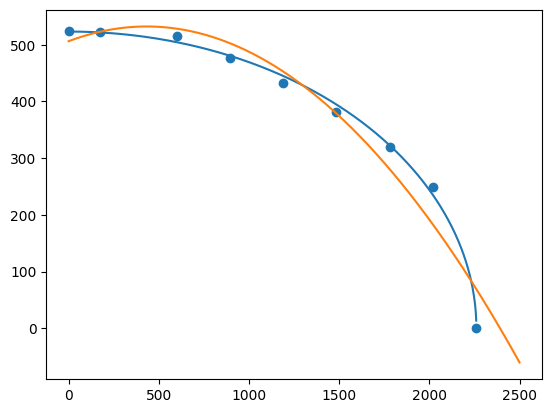

In [34]:
from scipy.optimize import curve_fit
from scipy.integrate import quad
import matplotlib.pyplot as plt

# Convertendo para uma asa elíptica	
A = 2260.5 # Envergadura [mm]
B= 2*S_half/np.pi/A
print(B)
def elliptic_chord(x):
    return 2*((A**2*B**2-x**2*B**2)/(A**2))**(0.5)
# Obtendo corda da asa de Stender
# Função de ajuste polinomial de grau 2 (pode ajustar o grau se necessário)
def poly2(x, a, b, c):
    return a * x**2 + b * x + c
stender_chords = []
for i in range(len(Cordas_Asa)):
    stender_chords.append((elliptic_chord(Dists_Nervuras[i])*Cordas_Asa[i])**(0.5))
print(stender_chords)
# Ajuste dos dados (usa as posições das nervuras e as cordas ajustadas)
x_data = Dists_Nervuras
y_data = stender_chords

# Ajuste polinomial
popt, _ = curve_fit(poly2, x_data, y_data)
print(popt)

# Função ajustada
def fitted_chord(x):
    return poly2(x, *popt)
xvals = np.linspace(0,2500,1000)
yvals = elliptic_chord(xvals)
yvalsfit = fitted_chord(xvals)
plt.plot(xvals, yvals, label='Ajuste Polinomial')
plt.plot(xvals, yvalsfit, label='Corda Ajustada')
plt.scatter(Dists_Nervuras, stender_chords, label='Corda Ajustada')
# Discretização: pontos médios entre as posições das nervuras
midpoints = (Dists_Nervuras[:-1] + Dists_Nervuras[1:]) / 2
print(midpoints)
midpoints = np.concatenate(([0], midpoints, [Dists_Nervuras[-1]]))
print(midpoints)
# Integração da função ajustada em cada intervalo [Dists_Nervuras[i], Dists_Nervuras[i+1]]
integrated_chords = []
print(L_tot_caso_2/S_half)
for i in range(len(midpoints) - 1):
    area, _ = quad(fitted_chord, midpoints[i], midpoints[i+1])
    print(area)
    integrated_chords.append(area*L_tot_caso_2/S_half)

print("Coeficientes do ajuste polinomial:", popt)
print("Áreas integradas sob a curva ajustada em cada intervalo:", integrated_chords)

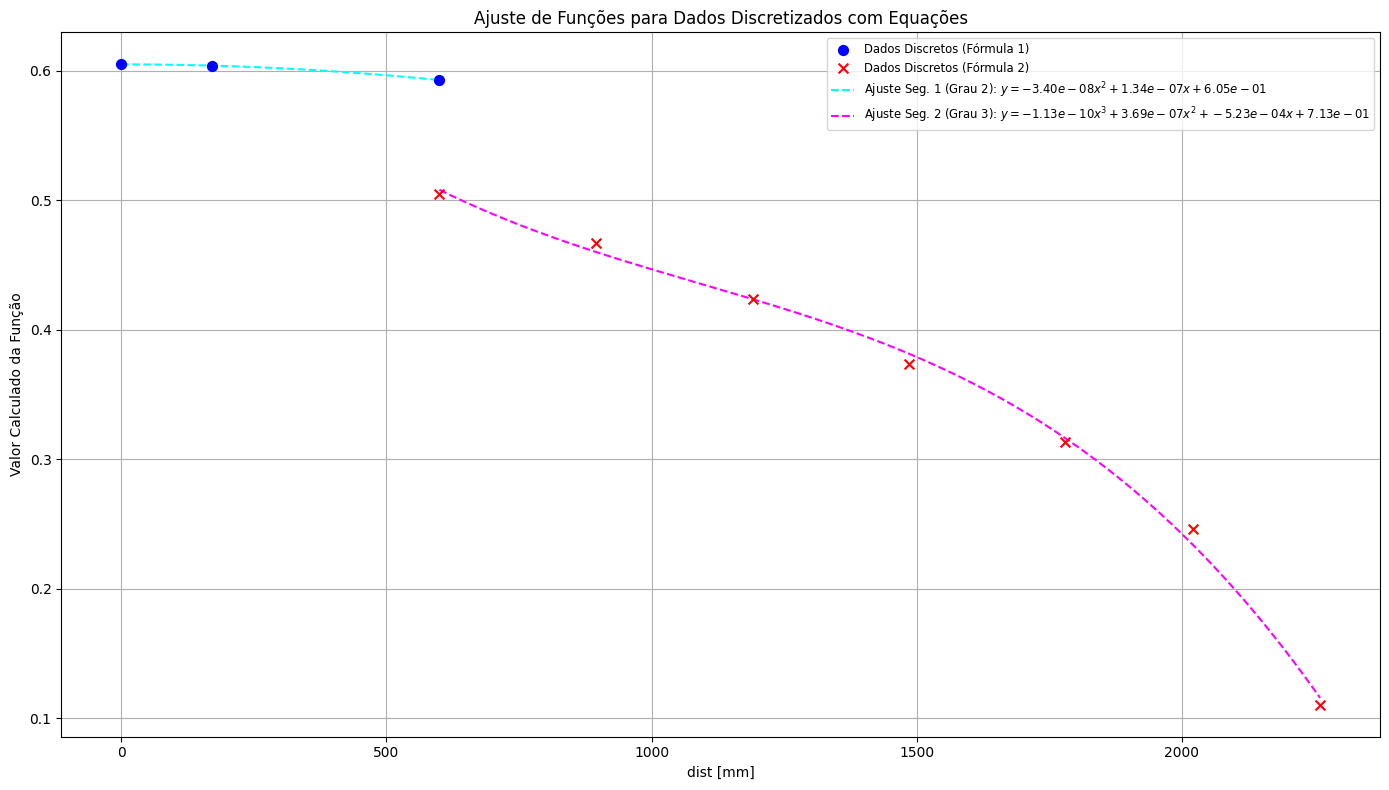

Coeficientes do polinômio para o Segmento 1 (Grau 2, maior grau primeiro):
[-3.39884067e-08  1.34405810e-07  6.05025229e-01]
Equação Segmento 1: y = -3.398841e-08x^2 + 1.344058e-07x + 6.050252e-01

Valores discretos y para o Segmento 1:
  dist: 0.00, y_calc: 0.605025, y_fit: 0.605025
  dist: 172.00, y_calc: 0.604043, y_fit: 0.604043
  dist: 600.00, y_calc: 0.592870, y_fit: 0.592870

Coeficientes do polinômio para o Segmento 2 (Grau 3, maior grau primeiro):
[-1.12564156e-10  3.68790724e-07 -5.22849154e-04  7.13369217e-01]
Equação Segmento 2: y = -1.125642e-10x^3 + 3.687907e-07x^2 + -5.228492e-04x + 7.133692e-01

Valores discretos y para o Segmento 2:
  dist: 600.00, y_calc: 0.504990, y_fit: 0.508111
  dist: 896.00, y_calc: 0.467061, y_fit: 0.459997
  dist: 1190.50, y_calc: 0.423803, y_fit: 0.423673
  dist: 1485.00, y_calc: 0.373718, y_fit: 0.381584
  dist: 1779.50, y_calc: 0.313646, y_fit: 0.316480
  dist: 2020.00, y_calc: 0.246149, y_fit: 0.234228
  dist: 2260.50, y_calc: 0.110433, y_f

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Dados fornecidos
c_array = np.array([525, 525, 525, 473.16, 421.33, 369.5, 317.67, 265.83, 214], dtype=float)
dist_array = np.array([0, 172, 600, 896, 1190.5, 1485, 1779.5, 2020, 2260.5], dtype=float)

# Constantes das fórmulas
k1_coeff = 0.5 * 0.0005439245 * 7.142 * 0.261
k2_coeff = 0.5 * 0.0005439245 * 7.27 * 0.261
term_A_c_multiplier = 525.0
term_B_c_multiplier = 369.5
common_term_multiplier = 4.0 / np.pi
denominator_sqrt_const = 4521.0

# Função para calcular o termo da raiz quadrada, com verificação para evitar erros de domínio
def calculate_sqrt_term(d_val):
    # Garante que o argumento da raiz quadrada não seja negativo
    # devido a possíveis imprecisões de ponto flutuante quando 2*d_val/denom == 1
    arg = 1 - (2 * d_val / denominator_sqrt_const)**2
    return np.sqrt(np.maximum(0, arg)) # np.maximum(0, arg) evita valores negativos pequenos

# Fórmula 1
def formula1(c_val, dist_val):
    sqrt_term = calculate_sqrt_term(dist_val)
    return k1_coeff * (c_val + common_term_multiplier * term_A_c_multiplier * sqrt_term)

# Fórmula 2
def formula2(c_val, dist_val):
    sqrt_term = calculate_sqrt_term(dist_val)
    return k2_coeff * (c_val + common_term_multiplier * term_B_c_multiplier * sqrt_term)

# Segmento 1: para c de 0 a 2 (índices 0, 1, 2)
dist_segment1_data = dist_array[0:3] # Renomeado para evitar confusão com os limites de integração
c_segment1 = c_array[0:3]
y_discrete_segment1 = np.array([formula1(c_val, d_val) for c_val, d_val in zip(c_segment1, dist_segment1_data)])

# Segmento 2: para c de 2 a 8 (índices 2, 3, ..., 8)
dist_segment2_data = dist_array[2:9] # Renomeado para evitar confusão
c_segment2 = c_array[2:9]
y_discrete_segment2 = np.array([formula2(c_val, d_val) for c_val, d_val in zip(c_segment2, dist_segment2_data)])

# Ajuste de função para o Segmento 1 (Polinômio de grau 2 para 3 pontos - ajuste exato)
coeffs_segment1 = np.polyfit(dist_segment1_data, y_discrete_segment1, 2)
poly_func_segment1 = np.poly1d(coeffs_segment1)

# Ajuste de função para o Segmento 2 (Polinômio de grau 3 para 7 pontos)
coeffs_segment2 = np.polyfit(dist_segment2_data, y_discrete_segment2, 3)
poly_func_segment2 = np.poly1d(coeffs_segment2)

# Gerar pontos para plotar as funções ajustadas
x_plot_segment1 = np.linspace(dist_segment1_data.min(), dist_segment1_data.max(), 200)
y_plot_segment1 = poly_func_segment1(x_plot_segment1)

x_plot_segment2 = np.linspace(dist_segment2_data.min(), dist_segment2_data.max(), 200)
y_plot_segment2 = poly_func_segment2(x_plot_segment2)

# Formatar equações dos polinômios para a legenda
# Segmento 1 (Grau 2: ax^2 + bx + c)
eq_segment1 = f"$y = {coeffs_segment1[0]:.2e}x^2 + {coeffs_segment1[1]:.2e}x + {coeffs_segment1[2]:.2e}$"
# Segmento 2 (Grau 3: ax^3 + bx^2 + cx + d)
eq_segment2 = f"$y = {coeffs_segment2[0]:.2e}x^3 + {coeffs_segment2[1]:.2e}x^2 + {coeffs_segment2[2]:.2e}x + {coeffs_segment2[3]:.2e}$"


# Plotagem
plt.figure(figsize=(14, 8)) 

plt.scatter(dist_segment1_data, y_discrete_segment1, color='blue', label='Dados Discretos (Fórmula 1)', s=50, zorder=5)
plt.scatter(dist_segment2_data, y_discrete_segment2, color='red', label='Dados Discretos (Fórmula 2)', s=50, marker='x', zorder=5)

plt.plot(x_plot_segment1, y_plot_segment1, color='cyan', linestyle='--', label=f'Ajuste Seg. 1 (Grau 2): {eq_segment1}', zorder=4)
plt.plot(x_plot_segment2, y_plot_segment2, color='magenta', linestyle='--', label=f'Ajuste Seg. 2 (Grau 3): {eq_segment2}', zorder=4)

plt.title('Ajuste de Funções para Dados Discretizados com Equações')
plt.xlabel('dist [mm]')
plt.ylabel('Valor Calculado da Função')
plt.legend(fontsize='small') 
plt.grid(True)
plt.tight_layout() 
plt.show()

# Imprimir os coeficientes dos polinômios ajustados
print("Coeficientes do polinômio para o Segmento 1 (Grau 2, maior grau primeiro):")
print(coeffs_segment1)
print(f"Equação Segmento 1: y = {coeffs_segment1[0]:.6e}x^2 + {coeffs_segment1[1]:.6e}x + {coeffs_segment1[2]:.6e}")
print("\nValores discretos y para o Segmento 1:")
for d, y_val in zip(dist_segment1_data, y_discrete_segment1):
    print(f"  dist: {d:.2f}, y_calc: {y_val:.6f}, y_fit: {poly_func_segment1(d):.6f}")


print("\nCoeficientes do polinômio para o Segmento 2 (Grau 3, maior grau primeiro):")
print(coeffs_segment2)
print(f"Equação Segmento 2: y = {coeffs_segment2[0]:.6e}x^3 + {coeffs_segment2[1]:.6e}x^2 + {coeffs_segment2[2]:.6e}x + {coeffs_segment2[3]:.6e}")
print("\nValores discretos y para o Segmento 2:")
for d, y_val in zip(dist_segment2_data, y_discrete_segment2):
    print(f"  dist: {d:.2f}, y_calc: {y_val:.6f}, y_fit: {poly_func_segment2(d):.6f}")

y1_at_dist2 = formula1(c_array[2], dist_array[2])
y2_at_dist2 = formula2(c_array[2], dist_array[2])
fit1_at_dist2 = poly_func_segment1(dist_array[2])
fit2_at_dist2 = poly_func_segment2(dist_array[2])

print(f"\nNo ponto de junção dist = {dist_array[2]}:")
print(f"  Valor discreto (Fórmula 1): {y1_at_dist2:.6f}")
print(f"  Valor discreto (Fórmula 2): {y2_at_dist2:.6f}")
print(f"  Valor ajustado (Fit Segmento 1): {fit1_at_dist2:.6f}") 
print(f"  Valor ajustado (Fit Segmento 2): {fit2_at_dist2:.6f}")

# --- Nova Seção: Integração das Funções Ajustadas ---
print("\n--- Integração das Funções Ajustadas ---")

# Obter as primitivas (antiderivadas) das funções polinomiais
# A constante de integração é 0 por padrão com .integ()
primitive_func_segment1 = poly_func_segment1.integ()
primitive_func_segment2 = poly_func_segment2.integ()

integrated_values = []

# Iterar sobre os intervalos definidos por dist_array
# g(dist_array[i]) - g(dist_array[i-1])
for i in range(1, len(dist_array)):
    lower_bound = dist_array[i-1]
    upper_bound = dist_array[i]
    
    integral_value = 0
    function_used = ""

    # Determinar qual primitiva usar com base no intervalo
    # poly_func_segment1 foi ajustada para dist_array[0] a dist_array[2]
    # poly_func_segment2 foi ajustada para dist_array[2] a dist_array[8]
    
    # Se o intervalo está completamente dentro do domínio da função 1
    # Ou se o limite inferior do intervalo é menor que dist_array[2]
    # Isso cobre os intervalos [dist[0], dist[1]] e [dist[1], dist[2]]
    if upper_bound <= dist_array[2]: # ou lower_bound < dist_array[2]
        integral_value = primitive_func_segment1(upper_bound) - primitive_func_segment1(lower_bound)
        function_used = "g1(x) (primitiva de poly_func_segment1)"
    # Se o intervalo começa em ou depois de dist_array[2]
    # Isso cobre os intervalos [dist[2], dist[3]], ..., [dist[7], dist[8]]
    elif lower_bound >= dist_array[2]:
        integral_value = primitive_func_segment2(upper_bound) - primitive_func_segment2(lower_bound)
        function_used = "g2(x) (primitiva de poly_func_segment2)"
    else:
        # Este caso não deveria ocorrer se os domínios das funções de ajuste são contíguos
        # e cobrem todo o dist_array.
        # No nosso caso, o ponto dist_array[2] é o limite.
        # O intervalo [dist_array[1], dist_array[2]] usa g1.
        # O intervalo [dist_array[2], dist_array[3]] usa g2.
        print(f"Aviso: Lógica de seleção de função não cobriu o intervalo [{lower_bound}, {upper_bound}]")
        continue
        
    integrated_values.append(integral_value)
    print(f"Intervalo [{lower_bound:.2f}, {upper_bound:.2f}]:")
    print(f"  Integral (g({upper_bound:.2f}) - g({lower_bound:.2f})) = {integral_value:.6f}")
    print(f"  (Usando {function_used})")

print("\nValores integrados para cada intervalo:")
print(integrated_values)
